# Tasks:

1. run segmentation for DNA

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

12168


In [9]:
import numpy as np
#from cellpose import models, utils
import os
import sys
import torch
import cv2
import h5py 
import ast

import pandas as pd
sys.path.append(r"..\..\..\..\Documents")
from ImageAnalysis3.io_tools.crop import generate_neighboring_crop
from skimage.segmentation import random_walker

channel_2_th = {
    '750':1000,
    '647':1500,
}
overwrite=False
torch.cuda.set_device('cuda:1')

print(os.getpid())

12168


In [3]:
save_folder = r'\\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230'
save_filenames = [os.path.join(save_folder, _fl) for _fl in os.listdir(save_folder)
                  if _fl.split(os.extsep)[-1]=='hdf5'][:-1]
print(len(save_filenames))
segmentation_folder = os.path.join(save_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)
cand_spots_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spots_folder):
    os.makedirs(cand_spots_folder)

24


In [4]:
save_filenames

['\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_000.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_001.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_002.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_003.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_004.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_005.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_006.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_007.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_008.hdf5',
 '\\\\mendel\\Mendel_SSD4\\Pu_Temp\\20220109-CTP11-1000_CTP12-DNA_from_1230\\Conv_zscan_009.hdf5',
 '\\\\mend

In [5]:
figure_folder = os.path.join(save_folder, 'Figures')
if not os.path.exists(figure_folder):
    print(f"Create figure_folder: {figure_folder}")
    os.makedirs(figure_folder)
else:
    print(f"Use figure_folder: {figure_folder}")
    
cand_spot_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spot_folder):
    os.makedirs(cand_spot_folder)
    print(f"Creating cand_spot_folder: {cand_spot_folder}")
else:
    print(f"Use cand_spot_folder: {cand_spot_folder}")

Use figure_folder: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Figures
Use cand_spot_folder: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\CandSpots


## run segmentation

In [6]:
from ImageAnalysis3.segmentation_tools import cell

2022-01-19 11:59:20,599 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


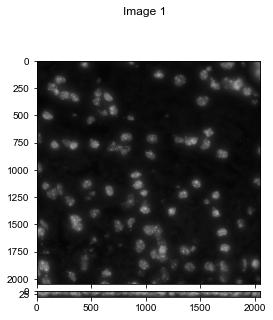

2022-01-19 12:01:12,079 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:01:12,080 [INFO] >>>> using GPU
2022-01-19 12:01:12,302 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:01:12,302 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:01:13,692 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:01:34,660 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.34it/s]
2022-01-19 12:01:35,395 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:01:41,176 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.40it/s]


2022-01-19 12:01:56,083 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.34it/s]


2022-01-19 12:01:58,927 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.41it/s]
2022-01-19 12:01:59,949 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:02:11,683 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.31it/s]


2022-01-19 12:02:23,455 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.37it/s]
2022-01-19 12:02:24,583 [INFO] network run in 71.52s
2022-01-19 12:02:43,879 [INFO] masks created in 19.30s
2022-01-19 12:02:47,708 [INFO] >>>> TOTAL TIME 95.41 sec
-- finish segmentation in 95.989s. 


C:\Users\puzheng\anaconda3\envs\ia3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_000_Segmentation.npy
-- removing segmentation_masks from class


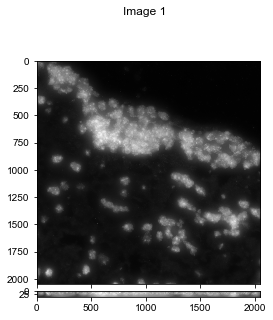

2022-01-19 12:02:58,462 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:02:58,462 [INFO] >>>> using GPU
2022-01-19 12:02:58,614 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:02:58,614 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:02:59,817 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:03:16,052 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.47it/s]
2022-01-19 12:03:16,708 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:03:22,255 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.89it/s]


2022-01-19 12:03:36,583 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.70it/s]


2022-01-19 12:03:39,320 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.93it/s]
2022-01-19 12:03:40,271 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:03:51,578 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.94it/s]


2022-01-19 12:04:02,943 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.89it/s]
2022-01-19 12:04:03,989 [INFO] network run in 64.76s
2022-01-19 12:04:24,474 [INFO] masks created in 20.48s
2022-01-19 12:04:28,255 [INFO] >>>> TOTAL TIME 89.64 sec
-- finish segmentation in 90.119s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_001_Segmentation.npy
-- removing segmentation_masks from class


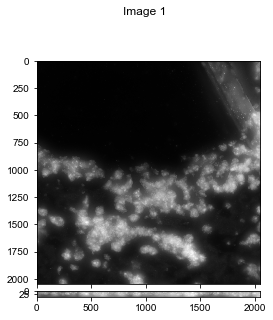

2022-01-19 12:04:38,786 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:04:38,786 [INFO] >>>> using GPU
2022-01-19 12:04:38,943 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:04:38,943 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:04:40,177 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:04:56,458 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.47it/s]
2022-01-19 12:04:57,099 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:05:02,662 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.18it/s]


2022-01-19 12:05:16,990 [INFO] 49%|####9     | 40/81 [00:02<00:02, 15.14it/s]


2022-01-19 12:05:19,741 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.89it/s]
2022-01-19 12:05:20,693 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:05:31,943 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.03it/s]


2022-01-19 12:05:43,384 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.89it/s]
2022-01-19 12:05:44,412 [INFO] network run in 64.86s
2022-01-19 12:06:04,755 [INFO] masks created in 20.34s
2022-01-19 12:06:08,834 [INFO] >>>> TOTAL TIME 89.89 sec
-- finish segmentation in 90.422s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_002_Segmentation.npy
-- removing segmentation_masks from class


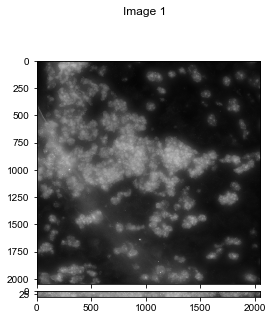

2022-01-19 12:06:20,725 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:06:20,725 [INFO] >>>> using GPU
2022-01-19 12:06:20,881 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:06:20,881 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:06:22,224 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:06:38,756 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.38it/s]
2022-01-19 12:06:39,443 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:06:45,115 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.82it/s]


2022-01-19 12:06:59,724 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.79it/s]


2022-01-19 12:07:02,486 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.71it/s]
2022-01-19 12:07:03,538 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:07:14,927 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]


2022-01-19 12:07:26,437 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.75it/s]
2022-01-19 12:07:27,600 [INFO] network run in 66.09s
2022-01-19 12:07:50,865 [INFO] masks created in 23.27s
2022-01-19 12:07:54,912 [INFO] >>>> TOTAL TIME 94.03 sec
-- finish segmentation in 94.552s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_003_Segmentation.npy
-- removing segmentation_masks from class


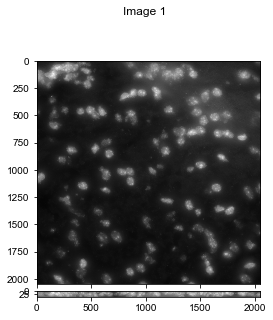

2022-01-19 12:08:06,084 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:08:06,084 [INFO] >>>> using GPU
2022-01-19 12:08:06,273 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:08:06,273 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:08:07,662 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:08:24,319 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.37it/s]
2022-01-19 12:08:24,991 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:08:30,631 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.76it/s]


2022-01-19 12:08:45,116 [INFO] 48%|####8     | 39/81 [00:02<00:02, 15.00it/s]


2022-01-19 12:08:47,944 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]
2022-01-19 12:08:49,022 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:09:00,381 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.00it/s]


2022-01-19 12:09:11,976 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.68it/s]
2022-01-19 12:09:13,162 [INFO] network run in 66.24s
2022-01-19 12:09:33,272 [INFO] masks created in 20.11s
2022-01-19 12:09:37,397 [INFO] >>>> TOTAL TIME 91.12 sec
-- finish segmentation in 91.657s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_004_Segmentation.npy
-- removing segmentation_masks from class


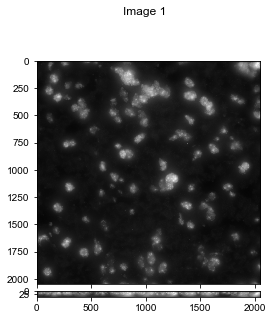

2022-01-19 12:09:48,756 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:09:48,772 [INFO] >>>> using GPU
2022-01-19 12:09:48,929 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:09:48,929 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:09:50,307 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:10:06,944 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.35it/s]
2022-01-19 12:10:07,663 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:10:13,335 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.94it/s]


2022-01-19 12:10:27,975 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.75it/s]


2022-01-19 12:10:30,753 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.71it/s]
2022-01-19 12:10:31,773 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:10:43,266 [INFO] 98%|#########7| 79/81 [00:05<00:00, 14.11it/s]


2022-01-19 12:10:54,991 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.73it/s]
2022-01-19 12:10:56,116 [INFO] network run in 66.52s
2022-01-19 12:11:15,413 [INFO] masks created in 19.30s
2022-01-19 12:11:19,538 [INFO] >>>> TOTAL TIME 90.61 sec
-- finish segmentation in 91.157s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_005_Segmentation.npy
-- removing segmentation_masks from class


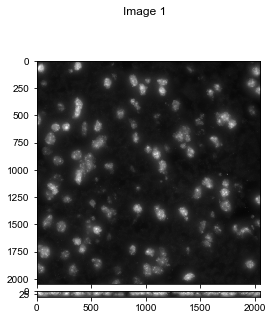

2022-01-19 12:11:30,882 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:11:30,882 [INFO] >>>> using GPU
2022-01-19 12:11:31,054 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:11:31,054 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:11:32,444 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:11:49,019 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.39it/s]
2022-01-19 12:11:49,711 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:11:55,369 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.74it/s]


2022-01-19 12:12:09,882 [INFO] 49%|####9     | 40/81 [00:02<00:02, 15.02it/s]


2022-01-19 12:12:12,648 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]
2022-01-19 12:12:13,757 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:12:25,190 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.74it/s]


2022-01-19 12:12:36,773 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.64it/s]
2022-01-19 12:12:37,960 [INFO] network run in 66.22s
2022-01-19 12:12:57,789 [INFO] masks created in 19.83s
2022-01-19 12:13:01,945 [INFO] >>>> TOTAL TIME 90.89 sec
-- finish segmentation in 91.422s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_006_Segmentation.npy
-- removing segmentation_masks from class


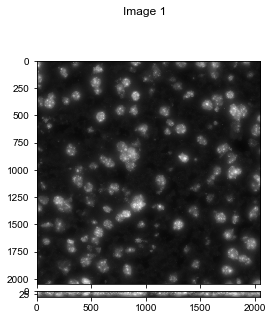

2022-01-19 12:13:13,523 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:13:13,523 [INFO] >>>> using GPU
2022-01-19 12:13:13,679 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:13:13,679 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:13:15,023 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:13:31,617 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.38it/s]
2022-01-19 12:13:32,331 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:13:37,929 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.11it/s]


2022-01-19 12:13:52,500 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.61it/s]


2022-01-19 12:13:55,275 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.64it/s]
2022-01-19 12:13:56,336 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:14:07,862 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.70it/s]


2022-01-19 12:14:19,461 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.64it/s]
2022-01-19 12:14:20,618 [INFO] network run in 66.28s
2022-01-19 12:14:43,461 [INFO] masks created in 22.84s
2022-01-19 12:14:47,524 [INFO] >>>> TOTAL TIME 93.84 sec
-- finish segmentation in 94.344s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_007_Segmentation.npy
-- removing segmentation_masks from class


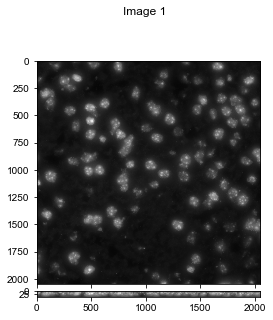

2022-01-19 12:14:59,204 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:14:59,205 [INFO] >>>> using GPU
2022-01-19 12:14:59,354 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:14:59,354 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:15:00,805 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:15:17,383 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.40it/s]
2022-01-19 12:15:18,086 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:15:23,727 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.02it/s]


2022-01-19 12:15:38,352 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.99it/s]


2022-01-19 12:15:41,145 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.69it/s]
2022-01-19 12:15:42,211 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:15:53,688 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.62it/s]


2022-01-19 12:16:05,288 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.65it/s]
2022-01-19 12:16:06,461 [INFO] network run in 66.42s
2022-01-19 12:16:27,899 [INFO] masks created in 21.44s
2022-01-19 12:16:31,962 [INFO] >>>> TOTAL TIME 92.61 sec
-- finish segmentation in 93.102s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_008_Segmentation.npy
-- removing segmentation_masks from class


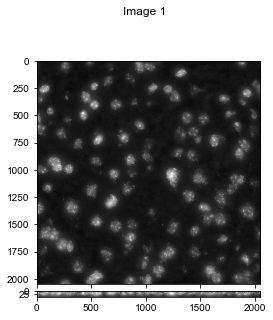

2022-01-19 12:16:43,274 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:16:43,274 [INFO] >>>> using GPU
2022-01-19 12:16:43,431 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:16:43,431 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:16:44,884 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:17:01,353 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.37it/s]
2022-01-19 12:17:02,025 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:17:07,649 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.77it/s]


2022-01-19 12:17:22,102 [INFO] 47%|####6     | 38/81 [00:02<00:02, 15.16it/s]


2022-01-19 12:17:25,017 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.79it/s]
2022-01-19 12:17:26,134 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:17:37,493 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.72it/s]


2022-01-19 12:17:49,248 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.35it/s]
2022-01-19 12:17:50,415 [INFO] network run in 66.28s
2022-01-19 12:18:12,125 [INFO] masks created in 21.71s
2022-01-19 12:18:16,509 [INFO] >>>> TOTAL TIME 93.08 sec
-- finish segmentation in 93.578s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_009_Segmentation.npy
-- removing segmentation_masks from class


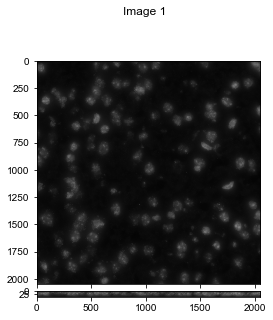

2022-01-19 12:18:28,181 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:18:28,181 [INFO] >>>> using GPU
2022-01-19 12:18:28,353 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:18:28,353 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:18:29,655 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:18:46,212 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.40it/s]
2022-01-19 12:18:46,915 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:18:52,511 [INFO] 98%|#########7| 79/81 [00:05<00:00, 14.76it/s]


2022-01-19 12:19:06,837 [INFO] 43%|####3     | 35/81 [00:02<00:03, 15.05it/s]


2022-01-19 12:19:09,970 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.71it/s]
2022-01-19 12:19:11,056 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:19:22,181 [INFO] 93%|#########2| 75/81 [00:05<00:00, 14.78it/s]


2022-01-19 12:19:34,262 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.43it/s]
2022-01-19 12:19:35,400 [INFO] network run in 66.42s
2022-01-19 12:19:57,197 [INFO] masks created in 21.80s
2022-01-19 12:20:01,322 [INFO] >>>> TOTAL TIME 92.97 sec
-- finish segmentation in 93.563s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_010_Segmentation.npy
-- removing segmentation_masks from class


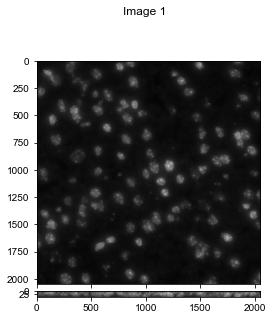

2022-01-19 12:20:12,869 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:20:12,869 [INFO] >>>> using GPU
2022-01-19 12:20:13,019 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:20:13,019 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:20:14,369 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:20:30,932 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.34it/s]
2022-01-19 12:20:31,603 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:20:37,197 [INFO] 98%|#########7| 79/81 [00:05<00:00, 14.49it/s]


2022-01-19 12:20:51,737 [INFO] 47%|####6     | 38/81 [00:02<00:02, 14.37it/s]


2022-01-19 12:20:54,674 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.58it/s]
2022-01-19 12:20:55,760 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:21:07,214 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.69it/s]


2022-01-19 12:21:18,963 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.28it/s]
2022-01-19 12:21:20,197 [INFO] network run in 66.53s
2022-01-19 12:21:41,885 [INFO] masks created in 21.69s
2022-01-19 12:21:45,947 [INFO] >>>> TOTAL TIME 92.93 sec
-- finish segmentation in 93.435s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_011_Segmentation.npy
-- removing segmentation_masks from class


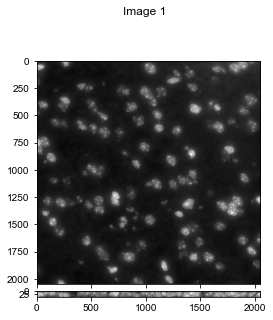

2022-01-19 12:21:57,385 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:21:57,385 [INFO] >>>> using GPU
2022-01-19 12:21:57,557 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:21:57,557 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:21:58,854 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:22:15,439 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.38it/s]
2022-01-19 12:22:16,166 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:22:21,820 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.67it/s]


2022-01-19 12:22:36,417 [INFO] 49%|####9     | 40/81 [00:02<00:02, 15.00it/s]


2022-01-19 12:22:39,232 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.63it/s]
2022-01-19 12:22:40,307 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:22:51,818 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.57it/s]


2022-01-19 12:23:03,431 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.69it/s]
2022-01-19 12:23:04,557 [INFO] network run in 66.38s
2022-01-19 12:23:25,354 [INFO] masks created in 20.80s
2022-01-19 12:23:29,448 [INFO] >>>> TOTAL TIME 91.89 sec
-- finish segmentation in 92.406s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_012_Segmentation.npy
-- removing segmentation_masks from class


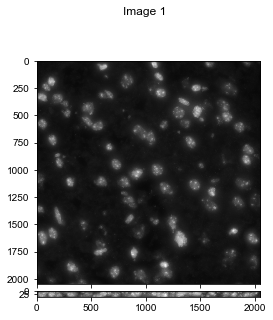

2022-01-19 12:23:40,788 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:23:40,788 [INFO] >>>> using GPU
2022-01-19 12:23:40,948 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:23:40,948 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:23:42,214 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:23:58,729 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.37it/s]
2022-01-19 12:23:59,417 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:24:05,058 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.54it/s]


2022-01-19 12:24:19,636 [INFO] 48%|####8     | 39/81 [00:02<00:02, 14.44it/s]


2022-01-19 12:24:22,480 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.60it/s]
2022-01-19 12:24:23,589 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:24:34,870 [INFO] 96%|#########6| 78/81 [00:05<00:00, 14.61it/s]


2022-01-19 12:24:46,636 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.60it/s]
2022-01-19 12:24:47,823 [INFO] network run in 66.22s
2022-01-19 12:25:07,792 [INFO] masks created in 19.97s
2022-01-19 12:25:11,957 [INFO] >>>> TOTAL TIME 91.01 sec
-- finish segmentation in 91.506s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_013_Segmentation.npy
-- removing segmentation_masks from class


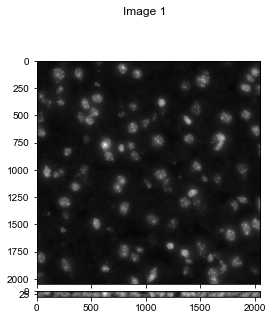

2022-01-19 12:25:23,417 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:25:23,417 [INFO] >>>> using GPU
2022-01-19 12:25:23,574 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:25:23,574 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:25:24,933 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:25:41,480 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.38it/s]
2022-01-19 12:25:42,173 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:25:47,761 [INFO] 98%|#########7| 79/81 [00:05<00:00, 14.83it/s]


2022-01-19 12:26:02,261 [INFO] 47%|####6     | 38/81 [00:02<00:02, 14.94it/s]


2022-01-19 12:26:05,184 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.72it/s]
2022-01-19 12:26:06,245 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:26:17,558 [INFO] 96%|#########6| 78/81 [00:05<00:00, 14.63it/s]


2022-01-19 12:26:29,399 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.53it/s]
2022-01-19 12:26:30,527 [INFO] network run in 66.30s
2022-01-19 12:26:50,531 [INFO] masks created in 20.00s
2022-01-19 12:26:54,668 [INFO] >>>> TOTAL TIME 91.09 sec
-- finish segmentation in 91.578s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_014_Segmentation.npy
-- removing segmentation_masks from class


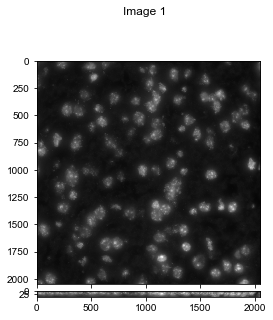

2022-01-19 12:27:06,308 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:27:06,308 [INFO] >>>> using GPU
2022-01-19 12:27:06,480 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:27:06,480 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:27:07,839 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:27:24,418 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.37it/s]
2022-01-19 12:27:25,121 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:27:30,805 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.71it/s]


2022-01-19 12:27:45,231 [INFO] 46%|####5     | 37/81 [00:02<00:03, 14.48it/s]


2022-01-19 12:27:48,199 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.68it/s]
2022-01-19 12:27:49,246 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:28:00,512 [INFO] 96%|#########6| 78/81 [00:05<00:00, 14.74it/s]


2022-01-19 12:28:12,463 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.29it/s]
2022-01-19 12:28:13,590 [INFO] network run in 66.45s
2022-01-19 12:28:36,137 [INFO] masks created in 22.55s
2022-01-19 12:28:40,217 [INFO] >>>> TOTAL TIME 93.74 sec
-- finish segmentation in 94.235s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_015_Segmentation.npy
-- removing segmentation_masks from class


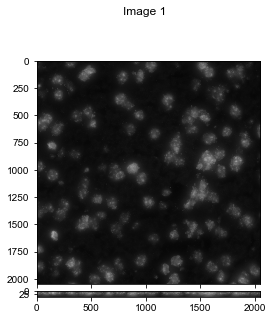

2022-01-19 12:28:51,699 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:28:51,699 [INFO] >>>> using GPU
2022-01-19 12:28:51,899 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:28:51,899 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:28:53,215 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:29:09,925 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.36it/s]
2022-01-19 12:29:10,590 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:29:16,247 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.72it/s]


2022-01-19 12:29:30,500 [INFO] 44%|####4     | 36/81 [00:02<00:03, 14.85it/s]


2022-01-19 12:29:33,578 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.67it/s]
2022-01-19 12:29:34,596 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:29:45,747 [INFO] 94%|#########3| 76/81 [00:05<00:00, 14.65it/s]


2022-01-19 12:29:57,678 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.66it/s]
2022-01-19 12:29:58,790 [INFO] network run in 66.25s
2022-01-19 12:30:22,563 [INFO] masks created in 23.77s
2022-01-19 12:30:26,497 [INFO] >>>> TOTAL TIME 94.60 sec
-- finish segmentation in 95.127s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_016_Segmentation.npy
-- removing segmentation_masks from class


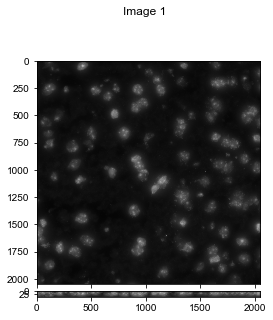

2022-01-19 12:30:37,774 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:30:37,774 [INFO] >>>> using GPU
2022-01-19 12:30:37,928 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:30:37,928 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:30:39,247 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:30:55,585 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.41it/s]
2022-01-19 12:30:56,273 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:31:01,872 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.81it/s]


2022-01-19 12:31:16,409 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.52it/s]


2022-01-19 12:31:19,242 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.57it/s]
2022-01-19 12:31:20,327 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:31:31,853 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.58it/s]


2022-01-19 12:31:43,478 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.61it/s]
2022-01-19 12:31:44,613 [INFO] network run in 66.01s
2022-01-19 12:32:04,952 [INFO] masks created in 20.34s
2022-01-19 12:32:08,956 [INFO] >>>> TOTAL TIME 91.03 sec
-- finish segmentation in 91.536s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_017_Segmentation.npy
-- removing segmentation_masks from class


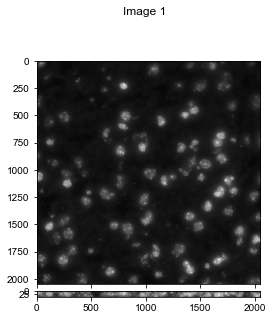

2022-01-19 12:32:20,208 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:32:20,208 [INFO] >>>> using GPU
2022-01-19 12:32:20,376 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:32:20,376 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:32:21,651 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:32:38,091 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.44it/s]
2022-01-19 12:32:38,758 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:32:44,414 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.71it/s]


2022-01-19 12:32:58,756 [INFO] 47%|####6     | 38/81 [00:02<00:02, 14.79it/s]


2022-01-19 12:33:01,658 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.74it/s]
2022-01-19 12:33:02,733 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:33:14,045 [INFO] 96%|#########6| 78/81 [00:05<00:00, 14.37it/s]


2022-01-19 12:33:25,831 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.67it/s]
2022-01-19 12:33:27,021 [INFO] network run in 66.01s
2022-01-19 12:33:46,259 [INFO] masks created in 19.24s
2022-01-19 12:33:50,228 [INFO] >>>> TOTAL TIME 89.85 sec
-- finish segmentation in 90.331s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_018_Segmentation.npy
-- removing segmentation_masks from class


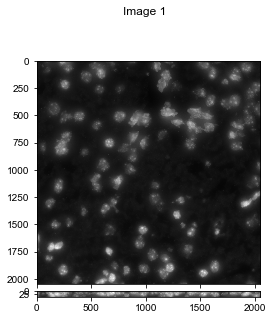

2022-01-19 12:34:01,215 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:34:01,215 [INFO] >>>> using GPU
2022-01-19 12:34:01,378 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:34:01,378 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:34:02,739 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:34:19,162 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.46it/s]
2022-01-19 12:34:19,815 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:34:25,520 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.22it/s]


2022-01-19 12:34:40,116 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.55it/s]


2022-01-19 12:34:42,869 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]
2022-01-19 12:34:43,916 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:34:55,314 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.76it/s]


2022-01-19 12:35:07,002 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.62it/s]
2022-01-19 12:35:08,126 [INFO] network run in 66.11s
2022-01-19 12:35:28,980 [INFO] masks created in 20.85s
2022-01-19 12:35:32,945 [INFO] >>>> TOTAL TIME 91.57 sec
-- finish segmentation in 92.076s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_019_Segmentation.npy
-- removing segmentation_masks from class


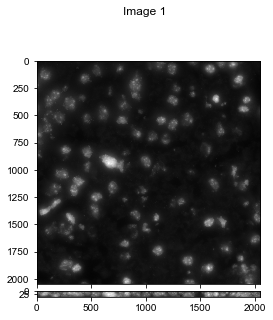

2022-01-19 12:35:44,270 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:35:44,270 [INFO] >>>> using GPU
2022-01-19 12:35:44,435 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:35:44,435 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:35:45,741 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:36:02,123 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.45it/s]
2022-01-19 12:36:02,796 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:36:08,405 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.80it/s]


2022-01-19 12:36:22,934 [INFO] 49%|####9     | 40/81 [00:02<00:02, 15.11it/s]


2022-01-19 12:36:25,714 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.72it/s]
2022-01-19 12:36:26,772 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:36:38,290 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.53it/s]


2022-01-19 12:36:49,767 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.68it/s]
2022-01-19 12:36:50,891 [INFO] network run in 65.81s
2022-01-19 12:37:11,432 [INFO] masks created in 20.54s
2022-01-19 12:37:15,415 [INFO] >>>> TOTAL TIME 90.98 sec
-- finish segmentation in 91.466s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_020_Segmentation.npy
-- removing segmentation_masks from class


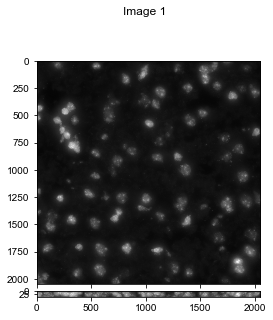

2022-01-19 12:37:26,356 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:37:26,356 [INFO] >>>> using GPU
2022-01-19 12:37:26,527 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:37:26,528 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:37:27,802 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:37:44,188 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.38it/s]
2022-01-19 12:37:44,861 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:37:50,560 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.43it/s]


2022-01-19 12:38:05,134 [INFO] 49%|####9     | 40/81 [00:02<00:02, 14.78it/s]


2022-01-19 12:38:07,927 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.64it/s]
2022-01-19 12:38:08,994 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:38:20,454 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.76it/s]


2022-01-19 12:38:32,097 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.57it/s]
2022-01-19 12:38:33,172 [INFO] network run in 66.00s
2022-01-19 12:38:51,773 [INFO] masks created in 18.60s
2022-01-19 12:38:55,869 [INFO] >>>> TOTAL TIME 89.34 sec
-- finish segmentation in 89.831s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_021_Segmentation.npy
-- removing segmentation_masks from class


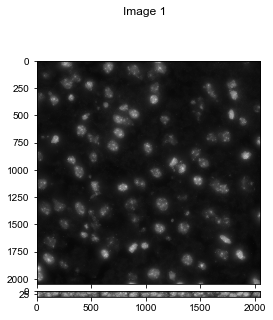

2022-01-19 12:39:05,875 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:39:05,875 [INFO] >>>> using GPU
2022-01-19 12:39:06,031 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:39:06,031 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:39:07,265 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:39:23,499 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.45it/s]
2022-01-19 12:39:24,124 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:39:29,655 [INFO] 99%|#########8| 80/81 [00:05<00:00, 15.10it/s]


2022-01-19 12:39:44,015 [INFO] 49%|####9     | 40/81 [00:02<00:02, 15.06it/s]


2022-01-19 12:39:46,765 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.90it/s]
2022-01-19 12:39:47,718 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:39:59,093 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.73it/s]


2022-01-19 12:40:10,531 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.85it/s]
2022-01-19 12:40:11,578 [INFO] network run in 64.94s
2022-01-19 12:40:30,093 [INFO] masks created in 18.52s
2022-01-19 12:40:33,828 [INFO] >>>> TOTAL TIME 87.80 sec
-- finish segmentation in 88.268s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_022_Segmentation.npy
-- removing segmentation_masks from class


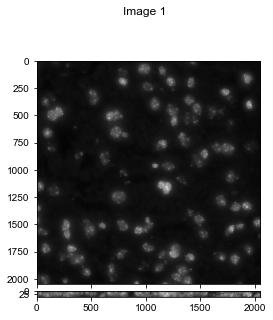

2022-01-19 12:40:43,531 [INFO] ** TORCH CUDA version installed and working. **
2022-01-19 12:40:43,531 [INFO] >>>> using GPU
2022-01-19 12:40:43,690 [INFO] ~~~ FINDING MASKS ~~~
2022-01-19 12:40:43,691 [INFO] multi-stack tiff read in as having 50 planes 2 channels
2022-01-19 12:40:44,922 [INFO] running YX: 50 planes of size (884, 884)
2022-01-19 12:41:01,165 [INFO] 100%|##########| 13/13 [00:03<00:00,  3.46it/s]
2022-01-19 12:41:01,797 [INFO] running ZY: 884 planes of size (50, 884)
2022-01-19 12:41:07,406 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.92it/s]


2022-01-19 12:41:21,656 [INFO] 47%|####6     | 38/81 [00:02<00:02, 15.14it/s]


2022-01-19 12:41:24,547 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.85it/s]
2022-01-19 12:41:25,515 [INFO] running ZX: 884 planes of size (50, 884)
2022-01-19 12:41:36,750 [INFO] 99%|#########8| 80/81 [00:05<00:00, 14.79it/s]


2022-01-19 12:41:48,266 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-19 12:41:49,297 [INFO] network run in 65.02s
2022-01-19 12:42:06,882 [INFO] masks created in 17.59s
2022-01-19 12:42:10,656 [INFO] >>>> TOTAL TIME 86.97 sec
-- finish segmentation in 87.438s. 
-- saving mask into file: \\mendel\Mendel_SSD4\Pu_Temp\20220109-CTP11-1000_CTP12-DNA_from_1230\Segmentation\Conv_zscan_023_Segmentation.npy
-- removing segmentation_masks from class


In [10]:
%matplotlib inline

for _filename in save_filenames:
    
    with h5py.File(_filename, "r", libver='latest') as _f:
        
        fov_id = _f.attrs['fov_id']
        
        #polyt_im = _f['protein']['ims'][0]
        dapi_im = _f.attrs['dapi_im']
        
        parameters = ast.literal_eval(_f.attrs['shared_parameters']) 
        combo_spots_list = [_spots[_spots[:,0]>0] for _spots in _f['combo']['spots'][:]]
        combo_channels = [_ch.decode() for _ch in _f['combo']['channels'][:]]
        
    pixel_sizes = parameters['distance_zxy']
    single_im_size = parameters['single_im_size']

    segmentation_filename = os.path.join(segmentation_folder, 
                                         os.path.basename(_filename).replace('.hdf5', '_Segmentation.npy') )
    
    visual_tools.imshow_mark_3d_v2([dapi_im])
    seg_class = cell.Cellpose_Segmentation_3D(dapi_im, None, 
                                              pixel_sizes=pixel_sizes,
                                              save_filename=segmentation_filename,
                                              )

    _masks = seg_class.run()
    seg_class.save()
    seg_class.clear()
    #delattr(seg_class, 'segmentation_masks')
    #del(seg_class)

## check seg

<IPython.core.display.Javascript object>


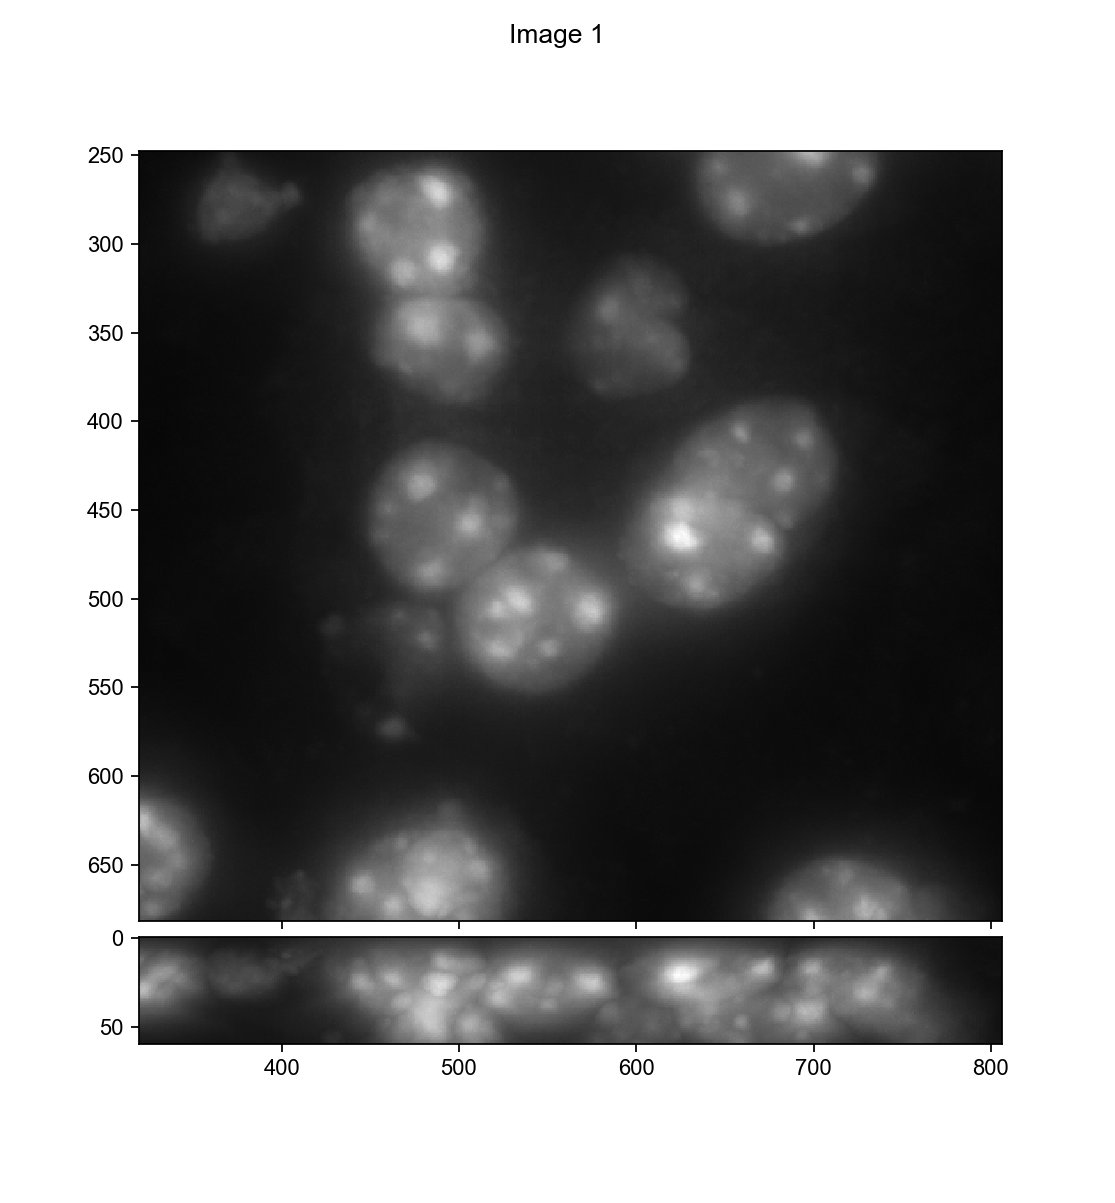

In [11]:
%matplotlib notebook
_mask = np.load(segmentation_filename)

visual_tools.imshow_mark_3d_v2([dapi_im, _mask])

## Partition spots into cellsm

In [5]:
from ImageAnalysis3.meta_tools.partition_spots import Spots_Partition
reload(ia.meta_tools.partition_spots)
from ImageAnalysis3.classes.preprocess import Spots3D
reload(io_tools.crop)

<module 'ImageAnalysis3.io_tools.crop' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\io_tools\\crop.py'>

In [ ]:
# DNA_fov

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only',
             'save_folder':r'H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only',
             'experiment_type': 'DNA',
             'num_threads': 26,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }

dapi_th = 2000

pixel_sizes = np.array(fov_param['shared_parameters']['distance_zxy'])

for _fov_id in np.arange(5,35):
    # create fov class
    dna_fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True,
                                              )
    
    visual_tools.imshow_mark_3d_v2([dna_fov.dapi_im])
    # load segmentation
    seg_label = np.load(os.path.join(segmentation_folder, 
                 os.path.basename(dna_fov.save_filename).replace('.hdf5', '_Segmentation.npy')))
    # load spots
    dna_fov._load_from_file('combo')
    all_spots_list = [Spots3D(_spots, bits=_id, pixel_sizes=pixel_sizes) for _spots, _id in zip(dna_fov.combo_spots_list, dna_fov.combo_ids)]
    # class
    sp = Spots_Partition(seg_label, "", 
                         search_radius=10, pixel_sizes=pixel_sizes,
                         save_filename=None)

    cell_2_spots = {_c:{} for _c in np.unique(seg_label)[np.unique(seg_label)>0]}

    label_dict = {}
    signal_dict = {}
    
    for _spots, _id in zip(all_spots_list, dna_fov.combo_ids):
        _labels = sp.spots_to_labels(sp.segmentation_masks, _spots, search_radius=sp.search_radius)

        _signals = sp.spots_to_DAPI(dna_fov.dapi_im, _spots, search_radius=sp.search_radius)

        label_dict[_id] = _labels
        signal_dict[_id] = _signals
        # parittion
        for _l in np.unique(_labels):
            if _l > 0:
                cell_2_spots[_l][_id] = _spots[(_labels==_l) * (_signals > dapi_th)]
                cell_2_spots[_l][_id].bits = _spots.bits[(_labels==_l) * (_signals > dapi_th)]
    
    %matplotlib inline  
    for _bit_id, _bit in enumerate(dna_fov.combo_ids):

        fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

        ax.imshow(dna_fov.dapi_im.max(0), cmap='Greys', vmin=1000, vmax=10000)

        _ref_coords = all_spots_list[_bit_id].to_coords()
        ax.scatter(_ref_coords[:,2], _ref_coords[:,1], s=0.75, color=[1,0,1])

        sel_inds = label_dict[_bit] > 0
        _coords = all_spots_list[_bit_id][sel_inds].to_coords()

        ax.scatter(_coords[:,2], _coords[:,1], s=0.75, c=label_dict[_bit][sel_inds], cmap='Spectral')

        ax.set_aspect('equal')

        ax.set_title(f"Spot partition, bit-{_bit}")

        ax.set_xlim(0, 2048)
        ax.set_ylim(2048, 0)
        fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotPartition_{_bit}.png')))
        fig.show()
    
    cell_spots_counts = []
    for _cell, _spots_dict in cell_2_spots.items():
        _spots_counts = []
        for _bit in dna_fov.combo_ids:
            if _bit in _spots_dict:
                _spots_counts.append(len(_spots_dict[_bit]))
            else:
                _spots_counts.append(0)
        cell_spots_counts.append(np.array(_spots_counts))
    cell_spots_counts = np.array(cell_spots_counts)


    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

    _pf = ax.imshow(cell_spots_counts, cmap='Spectral_r', vmin=0, vmax=60)

    ax.tick_params('both', labelsize=8, 
                    width=0.5, length=2,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]

    ax.set_xlabel('Bit', fontsize=8, labelpad=1)

    ax.set_ylabel('Cell id', fontsize=8, labelpad=0)
    # locate ax
    divider = make_axes_locatable(ax)
    # colorbar ax
    cax = divider.append_axes('right', size='7%', pad="5%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax, )

    cbar.ax.tick_params('both', labelsize=8, 
                    width=0.5, length=2,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax
    cbar.outline.set_linewidth(0.5)
    cbar.set_label('CandSpots count', 
                   fontsize=8, labelpad=5, rotation=270)

    fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotCounts.png')))
    fig.show()
    
    # save spots
    for _cell_id, _spots_list in cell_2_spots.items():
        _cand_filename = os.path.join(cand_spot_folder, os.path.basename(dna_fov.save_filename).replace('.hdf5', f'_Cell-{_cell_id}_CandSpots.pkl') )
        print(_cand_filename)
        pickle.dump(_spots_list, open(_cand_filename, 'wb'))

<IPython.core.display.Javascript object>


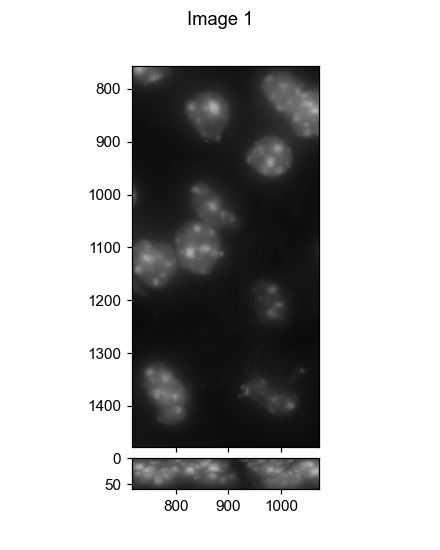

In [5]:
visual_tools.imshow_mark_3d_v2([dna_fov.dapi_im])

In [47]:
# load segmentation
seg_label = np.load(os.path.join(segmentation_folder, 
             os.path.basename(dna_fov.save_filename).replace('.hdf5', '_Segmentation.npy')))
# load spots
dna_fov._load_from_file('combo')
# load parameters
#pixel_sizes = dna_fov.shared_parameters['distance_zxy']
#single_im_size = dna_fov.shared_parameters['single_im_size']

all_spots_list = [Spots3D(_spots, bits=_id, pixel_sizes=pixel_sizes) for _spots, _id in zip(dna_fov.combo_spots_list, dna_fov.combo_ids)]

dapi_th = 2000

+ loading combo from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Conv_zscan_05.hdf5


In [66]:
#reload(ia.meta_tools.partition_spots)

from ImageAnalysis3.meta_tools.partition_spots import Spots_Partition
reload(ia.meta_tools.partition_spots)
from ImageAnalysis3.classes.preprocess import Spots3D
reload(io_tools.crop)

<module 'ImageAnalysis3.io_tools.crop' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\io_tools\\crop.py'>

In [ ]:
%%time
sp = Spots_Partition(seg_label, "", 
                     search_radius=10, #pixel_sizes=pixel_sizes,
                     save_filename=None)

cell_2_spots = {_c:{} for _c in np.unique(seg_label)[np.unique(seg_label)>0]}

label_dict = {}
signal_dict = {}

In [68]:
%%time
for _spots, _id in zip(all_spots_list, dna_fov.combo_ids):
    _labels = sp.spots_to_labels(sp.segmentation_masks, _spots, search_radius=sp.search_radius)

    _signals = sp.spots_to_DAPI(dna_fov.dapi_im, _spots, search_radius=sp.search_radius)
    
    label_dict[_id] = _labels
    signal_dict[_id] = _signals
    # parittion
    for _l in np.unique(_labels):
        if _l > 0:
            cell_2_spots[_l][_id] = _spots[(_labels==_l) * (_signals > dapi_th)]
            cell_2_spots[_l][_id].bits = _spots.bits[(_labels==_l) * (_signals > dapi_th)]

- partition barcodes for 9920 spots
- calculate local DAPI signal for 9920 spots
- partition barcodes for 12200 spots
- calculate local DAPI signal for 12200 spots
- partition barcodes for 9828 spots
- calculate local DAPI signal for 9828 spots
- partition barcodes for 13482 spots
- calculate local DAPI signal for 13482 spots
- partition barcodes for 10041 spots
- calculate local DAPI signal for 10041 spots
- partition barcodes for 11664 spots
- calculate local DAPI signal for 11664 spots
- partition barcodes for 10501 spots
- calculate local DAPI signal for 10501 spots
- partition barcodes for 12686 spots
- calculate local DAPI signal for 12686 spots
- partition barcodes for 10478 spots
- calculate local DAPI signal for 10478 spots
- partition barcodes for 13027 spots
- calculate local DAPI signal for 13027 spots
- partition barcodes for 9891 spots
- calculate local DAPI signal for 9891 spots
- partition barcodes for 12603 spots
- calculate local DAPI signal for 12603 spots
- partitio

## visualize partiton results

In [ ]:
def visualize_spot_partitions(_spots, _labels, 
                              save=True, figure_folder=None, )

In [ ]:
%matplotlib inline
for _bit_id, _bit in enumerate(dna_fov.combo_ids):
    
    fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

    ax.imshow(dna_fov.dapi_im.max(0), cmap='Greys', vmin=1000, vmax=10000)

    _ref_coords = all_spots_list[_bit_id].to_coords()
    ax.scatter(_ref_coords[:,2], _ref_coords[:,1], s=0.75, color=[1,0,1])

    sel_inds = label_dict[_bit] > 0
    _coords = all_spots_list[_bit_id][sel_inds].to_coords()

    ax.scatter(_coords[:,2], _coords[:,1], s=0.75, c=label_dict[_bit][sel_inds], cmap='Spectral')

    ax.set_aspect('equal')
    
    ax.set_title(f"Spot partition, bit-{_bit}")
    
    ax.set_xlim(0, 2048)
    ax.set_ylim(2048, 0)
    fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotPartition_{_bit}.png')))
    fig.show()
    

## number of spots per bits per cell

<IPython.core.display.Javascript object>


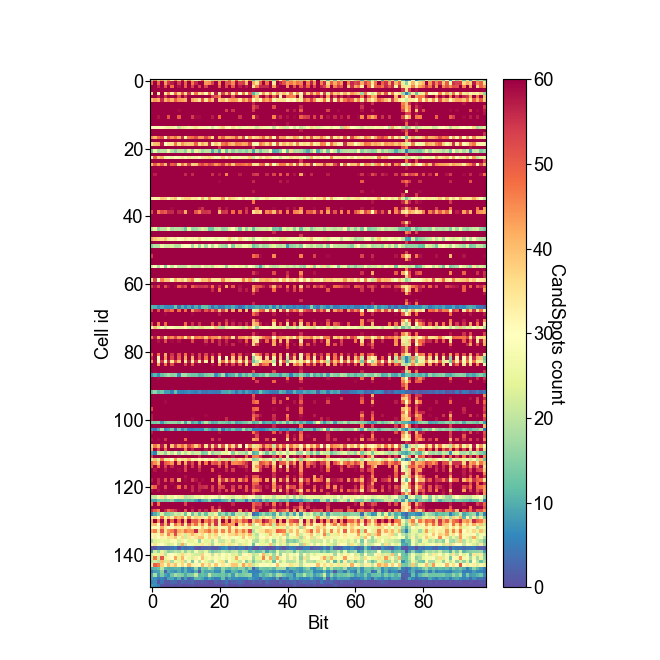

In [81]:
cell_spots_counts = []
for _cell, _spots_dict in cell_2_spots.items():
    _spots_counts = []
    for _bit in dna_fov.combo_ids:
        if _bit in _spots_dict:
            _spots_counts.append(len(_spots_dict[_bit]))
        else:
            _spots_counts.append(0)
    cell_spots_counts.append(np.array(_spots_counts))
cell_spots_counts = np.array(cell_spots_counts)


from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(4,4), dpi=150, )

_pf = ax.imshow(cell_spots_counts, cmap='Spectral_r', vmin=0, vmax=60)

ax.tick_params('both', labelsize=8, 
                width=0.5, length=2,
                pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

ax.set_xlabel('Bit', fontsize=8, labelpad=1)

ax.set_ylabel('Cell id', fontsize=8, labelpad=0)
# locate ax
divider = make_axes_locatable(ax)
# colorbar ax
cax = divider.append_axes('right', size='7%', pad="5%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax, )

cbar.ax.tick_params('both', labelsize=8, 
                width=0.5, length=2,
                pad=1, labelleft=False) # remove bottom ticklabels for ax
cbar.outline.set_linewidth(0.5)
cbar.set_label('CandSpots count', 
               fontsize=8, labelpad=5, rotation=270)

fig.savefig(os.path.join(figure_folder, dna_fov.fov_name.replace('.dax', f'_SpotCounts.png')))
fig.show()

## Save

In [82]:
# save spots
for _cell_id, _spots_list in cell_2_spots.items():
    _cand_filename = os.path.join(cand_spot_folder, os.path.basename(dna_fov.save_filename).replace('.hdf5', f'_Cell-{_cell_id}_CandSpots.pkl') )
    print(_cand_filename)
    pickle.dump(_spots_list, open(_cand_filename, 'wb'))

H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-1_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-2_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-3_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-4_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-5_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-6_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-7_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-8_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-9_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-10_CandSpots.pkl
H:\Pu_Temp\

H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-115_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-116_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-117_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-118_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-119_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-120_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-121_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-122_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-123_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\CandSpots\Conv_zscan_05_Cell-124_CandSpots.pkl
H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Ca

# Test decode

## load codebook

In [83]:
import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
#
codebook_df = pd.read_csv(codebook_filename, header=0)
codebook_df

name    id  NDB_784  NDB_755  NDB_826  NDB_713  NDB_865  \
0        1:3740000-3760000     1        0        0        0        0        0   
1        1:6240000-6260000     2        0        0        0        0        0   
2        1:8740000-8760000     3        0        0        0        0        0   
3      1:11240000-11260000     4        0        0        0        0        0   
4      1:13740000-13760000     5        0        0        0        0        0   
..                     ...   ...      ...      ...      ...      ...      ...   
983  X:161240000-161260000  1057        0        0        1        0        0   
984  X:163740000-163760000  1058        0        0        0        0        0   
985  X:166240000-166260000  1059        0        0        0        0        0   
986  X:168740000-168760000  1060        0        0        0        0        0   
987      Y:1240000-1260000  1062        0        0        0        0        0   

     NDB_725  NDB_817  NDB_710  ...  NDB_824  NDB_712  NDB_818  NDB_940  \
0          0        0        0  ...        0        0        0        0   
1          0        0        0  ...        0        0        0        0   
2          0        0        0  ...        0        0        0        0   
3          0        0        0  ...        0        0        0        1   
4          0        0        0  ...        0        0        1        0   
..       ...      ...      ...  ...      ...      ...      ...      ...   
983        0        0        0  ...        0        0        0        0   
984        0        0        0  ...        0        0        0        0   
985        1        0        0  ...        0        0        0        0   
986        0        0        0  ...        0        0        0        0   
987        0        0        1  ...        0        0        0        0   

     NDB_872  NDB_934  NDB_926  NDB_910  chr  chr_order  
0          0        0        0        0    1          0  
1          0        0        0        0    1          1  
2          0        0        0        0    1          2  
3          0        0        0        0    1          3  
4          0        0        0        0    1          4  
..       ...      ...      ...      ...  ...        ...  
983        0        1        0        0    X         52  
984        1        0        0        0    X         53  
985        0        0        0        0    X         54  
986        0        0        0        0    X         55  
987        0        0        0        0    Y          0  

[988 rows x 103 columns]

## load spot files

In [90]:
spot_filenames = [os.path.join(cand_spot_folder, _fl) for _fl in os.listdir(cand_spot_folder)]
print(len(spot_filenames))

150


In [91]:
import multiprocessing as mp
from ImageAnalysis3.classes import decode
reload(decode)
decode_args = [(_fl, codebook_df) for _fl in spot_filenames[:]
               if not os.path.exists(_fl.replace('CandSpots', 'Decoder'))]
print(len(decode_args))

150


In [ ]:
from ImageAnalysis3.classes import decode
reload(decode)
from ImageAnalysis3.classes import decode

In [115]:
%%time
with mp.Pool(44) as decode_pool:
    decode_results = decode_pool.starmap(decode.batch_decode_DNA, decode_args[:], chunksize=1)
    decode_pool.close()
    decode_pool.join()
    decode_pool.terminate()

Wall time: 2min 44s


# load decode results

In [116]:
decode_folder = r'H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Decoder'

decode_files = [os.path.join(decode_folder, _fl) for _fl in os.listdir(decode_folder) 
                if _fl.split(os.path.extsep)[-1]=='pkl']
print(len(decode_files))

115


In [117]:

%%time
import multiprocessing as mp
load_args = [(_fl, 'chr_2_zxys_list') for _fl in decode_files[:]]
print(len(load_args))
with mp.Pool(44) as load_pool:
    all_chr_2_zxys_list = load_pool.starmap(decode.batch_load_attr, 
                                            load_args, chunksize=1)
    load_pool.close()
    load_pool.join()
    load_pool.terminate()

all_chr_2_zxys_list = [_item for _item in all_chr_2_zxys_list if _item is not None]
print(len(all_chr_2_zxys_list))

115
115
Wall time: 5.19 s


In [118]:
%%time
import multiprocessing as mp

summary_args = [(_item, codebook_df) for _item in all_chr_2_zxys_list ]

with mp.Pool(44) as summary_pool:
    all_zxys_list = summary_pool.starmap(decode.DNA_Merfish_Decoder.summarize_zxys_by_regions, 
                                         summary_args, chunksize=1)
    summary_pool.close()
    summary_pool.join()
    summary_pool.terminate()

Wall time: 11.5 s


In [119]:
all_zxys_list = np.concatenate(all_zxys_list)

In [120]:
from scipy.spatial.distance import cdist,pdist,squareform
from tqdm import tqdm

In [121]:
all_distmaps = [squareform(pdist(_zxys)) for _zxys in tqdm(all_zxys_list)]

100%|████████████████████████████████████████████████████████████████████████████████| 230/230 [00:02<00:00, 77.75it/s]


In [123]:
%%time
from ImageAnalysis3.classes import postanalysis
median_distmap = postanalysis.parallel_reduce_matrix(all_distmaps, function='nanmedian', axis=0,
                                                     num_threads=44)

Wall time: 9.37 s


In [125]:
_ordered_chr_names = []
for _chr_name, _chr_reg_id in zip(codebook_df['chr'], codebook_df['chr_order']):
    if _chr_name not in _ordered_chr_names:
        _ordered_chr_names.append(_chr_name)
chr_2_indices = {_chr:np.array(codebook_df.loc[codebook_df['chr']==_chr].index)
                for _chr in np.unique(codebook_df['chr'].values)}

_labels_edges = np.array([0] + [np.max(chr_2_indices[_chr]) for _chr in _ordered_chr_names])

<IPython.core.display.Javascript object>


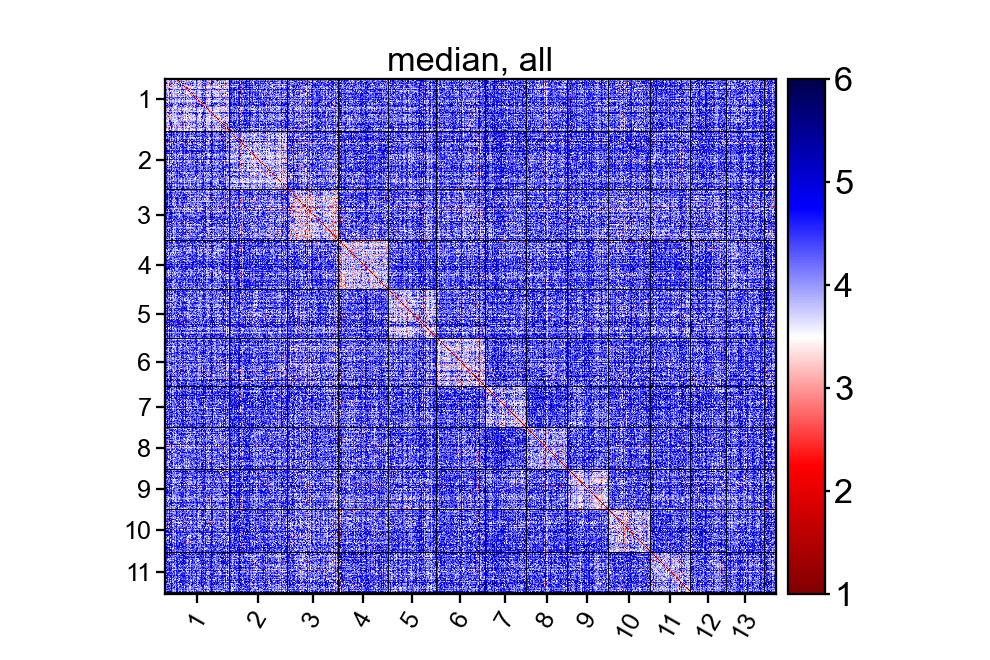

In [134]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(3,2), dpi=300)

ia.figure_tools.distmap.plot_distance_map(median_distmap, color_limits=[1,6],
                                          ax=ax,
                                          )
ax.set_title('median, all', fontsize=7.5, pad=2)

ax.set_xticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_xticklabels(_ordered_chr_names, fontsize=5.5, rotation=60,)
ax.set_yticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_yticklabels(_ordered_chr_names, fontsize=5.5, )

ax.hlines(_labels_edges, 0, len(median_distmap), color='black', linewidth=0.2)
ax.vlines(_labels_edges, 0, len(median_distmap), color='black', linewidth=0.2)

plt.gcf().subplots_adjust(bottom=0.1, left=0.1, right=0.9,)

fig.savefig(os.path.join(figure_folder, 'all_median_distmap.png'), transparent=True)
fig.show()